# 1. Preparation
install the required prerequisites

In [1]:
!pip install nest_asyncio
!pip install pmdarima

     ---------------------------------------- 83.6/83.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=4a559e08c53b95ec617a0ef22c4abbb04ed4a0afdcca7e6e2b842a11a68d2b27
  Stored in directory: c:\users\aorus\appdata\local\pip\cache\wheels\d2\ed\a5\da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
     -------------------------------------- 572.7/572.7 kB 3.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv('./DailyDelhiClimateTrain.csv')
test =  pd.read_csv('./DailyDelhiClimateTest.csv')

train["date"] = pd.to_datetime(train["date"], infer_datetime_format=True)
train = train.set_index("date")
test["date"] = pd.to_datetime(test["date"], infer_datetime_format=True)
test = test.set_index("date")

train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [7]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Import the needed libraries for plotting the data. Separate each of the columns independently. Afterwards print the value and plot the graph for each column

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_temp = train[["meantemp"]]

print(train_temp.head(5))
train_temp.tail(5)
#data is from 2013 to 2016

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000


,meantemp
date,
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238
2016-12-31,15.052632
2017-01-01,10.000000


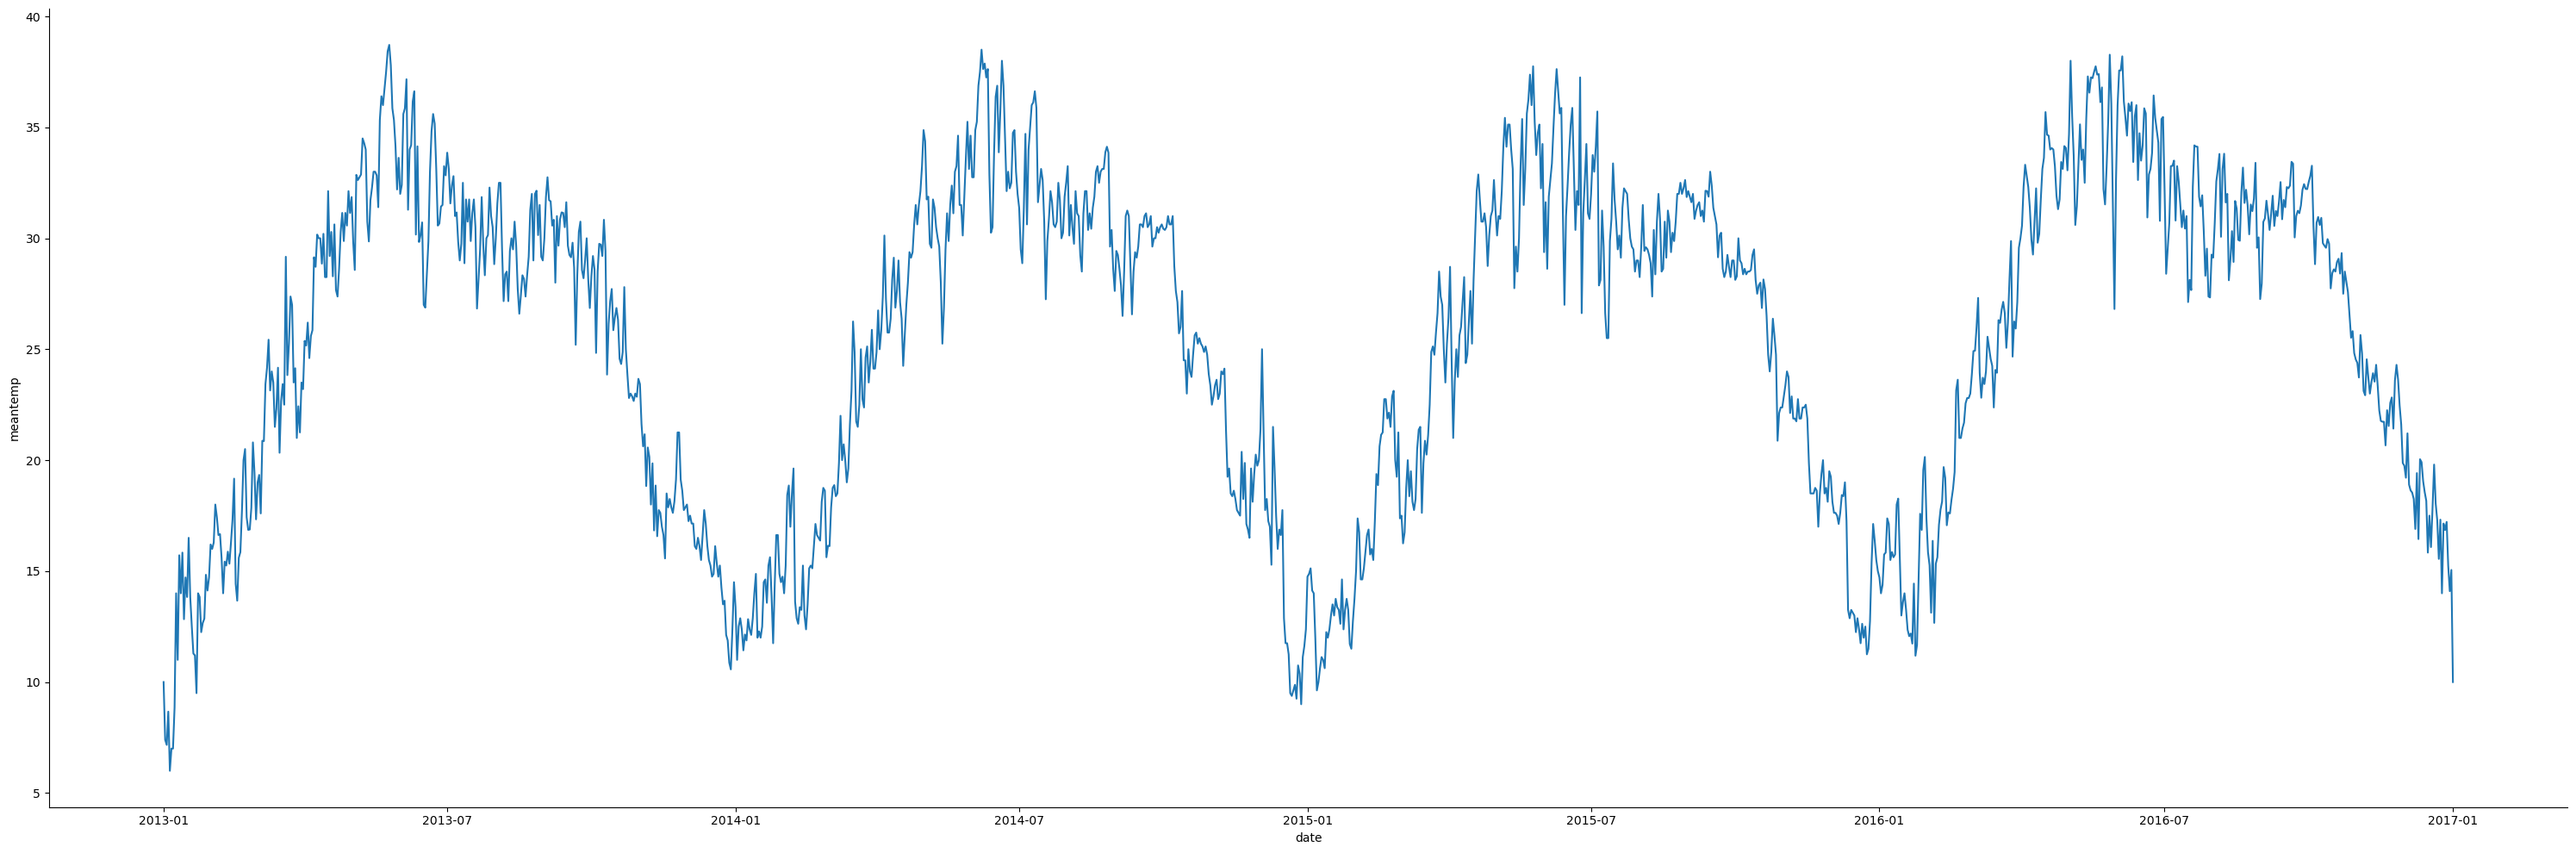

In [19]:
sns.relplot(x='date',y='meantemp',data=train_temp, kind="line", height=10, aspect=3)
plt.show()
plt.close()

In [17]:
train_humidity = train[["humidity"]]

print(train_humidity.head(5))
train_humidity.tail(5)

             humidity
date                 
2013-01-01  84.500000
2013-01-02  92.000000
2013-01-03  87.000000
2013-01-04  71.333333
2013-01-05  86.833333


,humidity
date,
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667
2016-12-31,87.000000
2017-01-01,100.000000


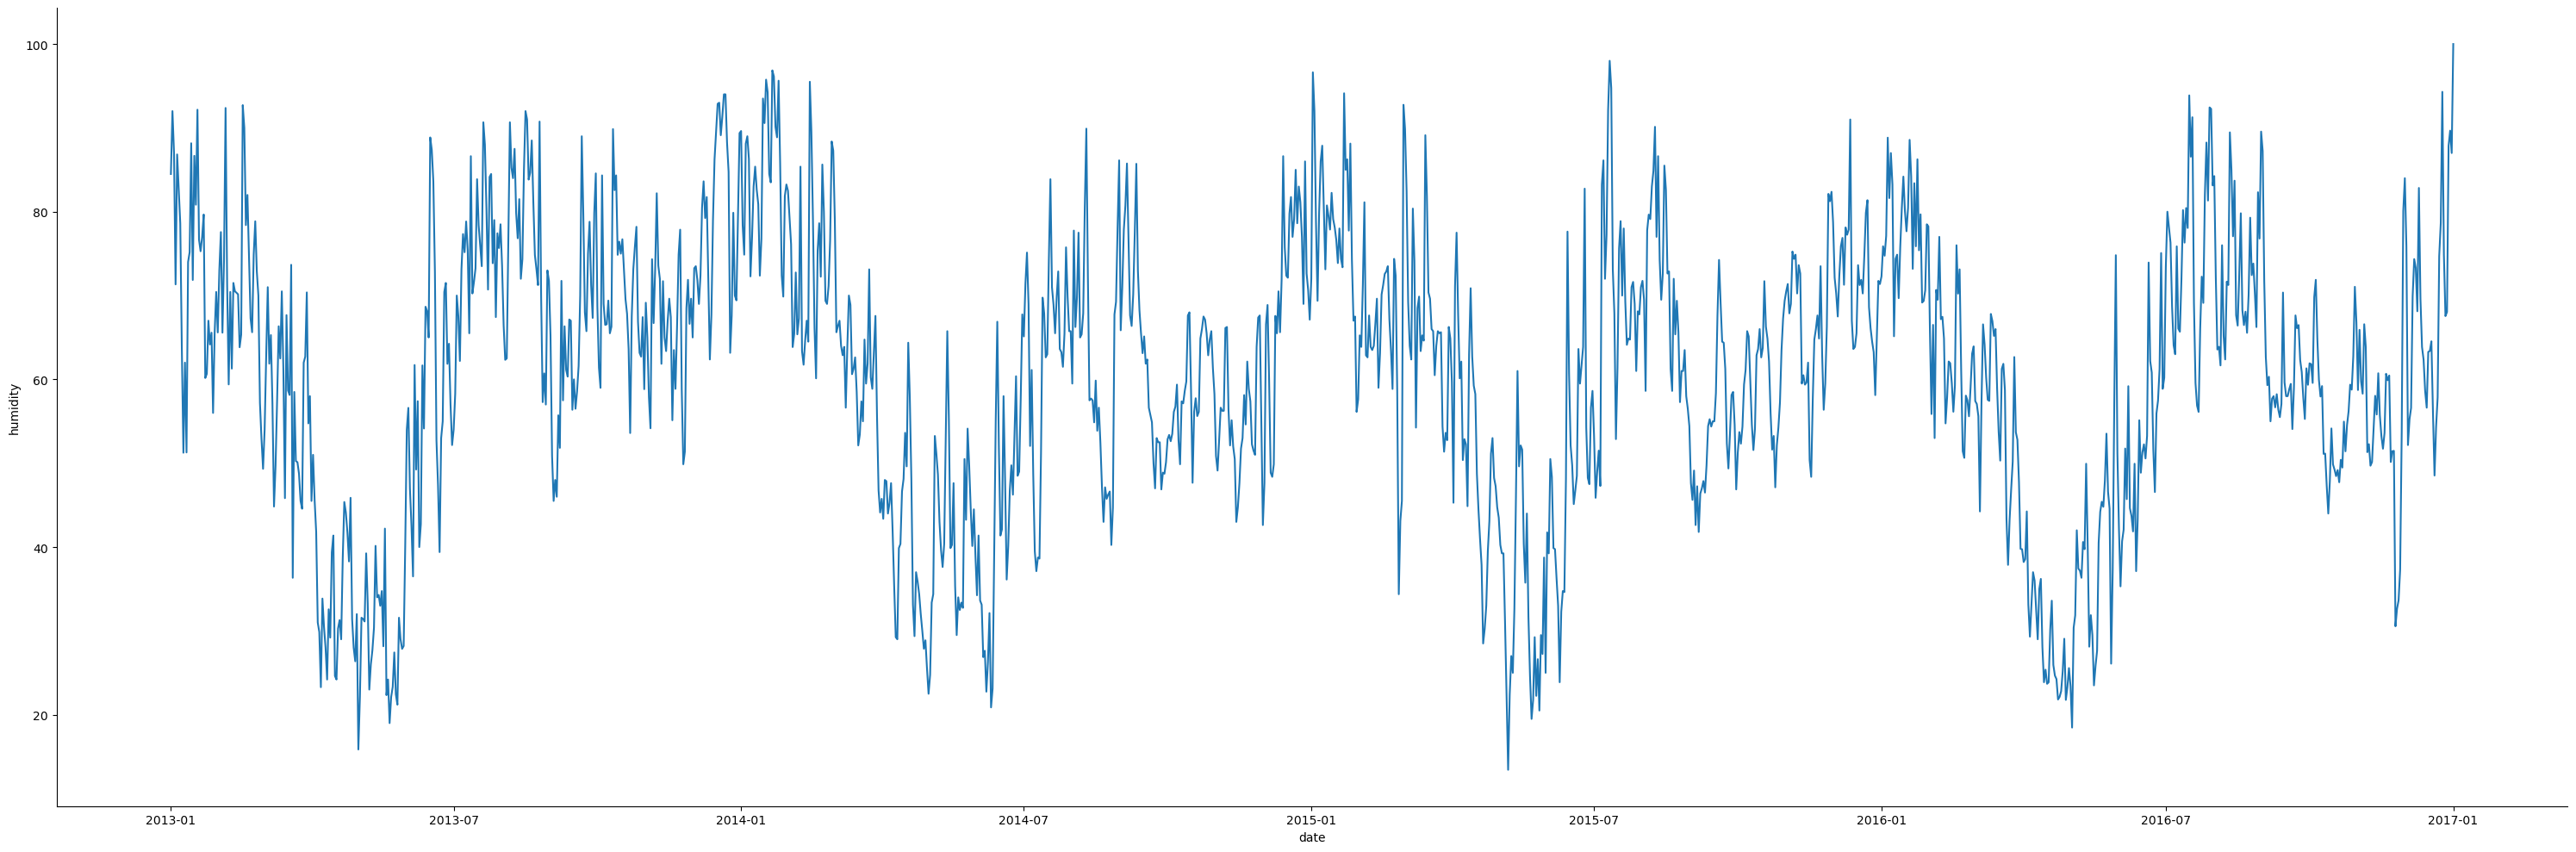

In [20]:
sns.relplot(x='date',y='humidity',data=train_humidity, kind="line", height=10, aspect=3)
plt.show()
plt.close()

In [13]:
train_wind = train[["wind_speed"]]

print(train_wind.head(5))
train_wind.tail(5)

            wind_speed
date                  
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000


,wind_speed
date,
2016-12-28,3.547826
2016-12-29,6.000000
2016-12-30,6.266667
2016-12-31,7.325000
2017-01-01,0.000000


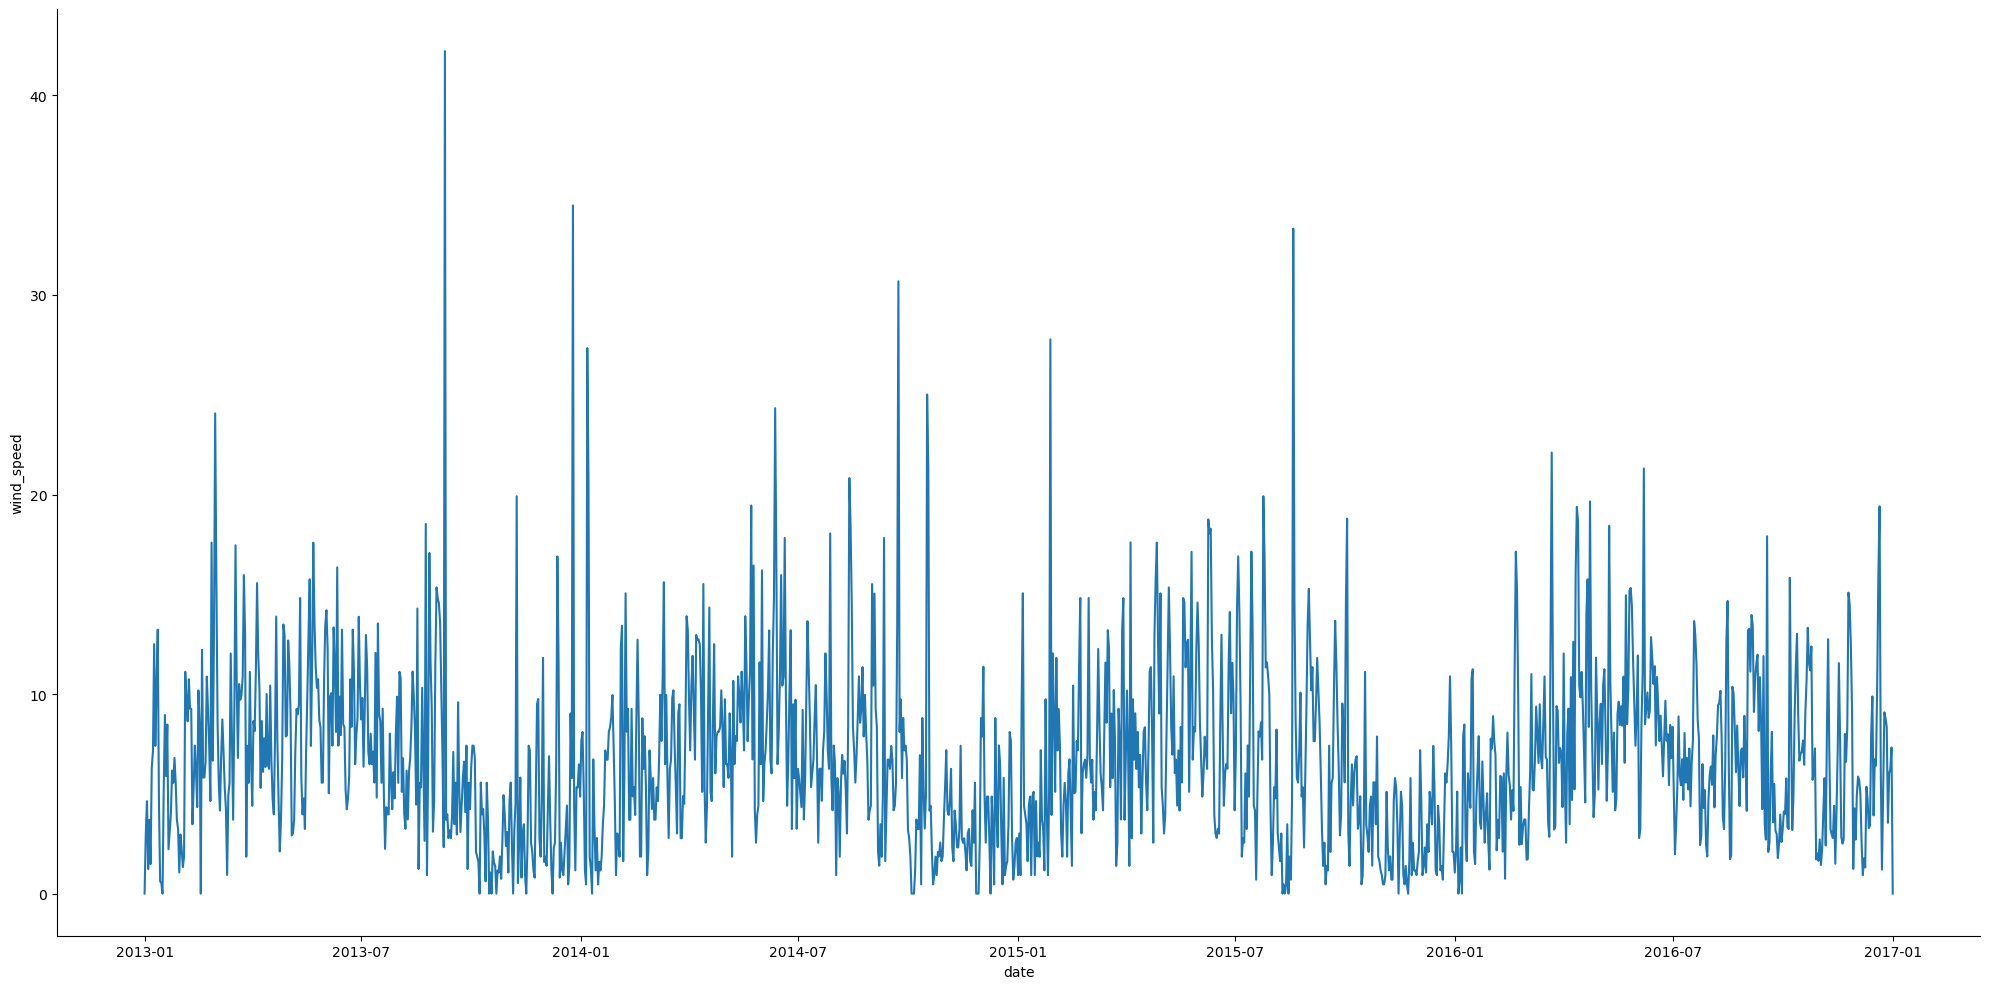

In [21]:
sns.relplot(x='date',y='wind_speed',data=train_wind, kind="line", height=10, aspect=2)
plt.show()
plt.close()

In [22]:
train_pressure = train[["meanpressure"]]


print(train_pressure.head(5))
train_pressure.tail(5)

            meanpressure
date                    
2013-01-01   1015.666667
2013-01-02   1017.800000
2013-01-03   1018.666667
2013-01-04   1017.166667
2013-01-05   1016.500000


,meanpressure
date,
2016-12-28,1015.565217
2016-12-29,1016.904762
2016-12-30,1017.904762
2016-12-31,1016.100000
2017-01-01,1016.000000


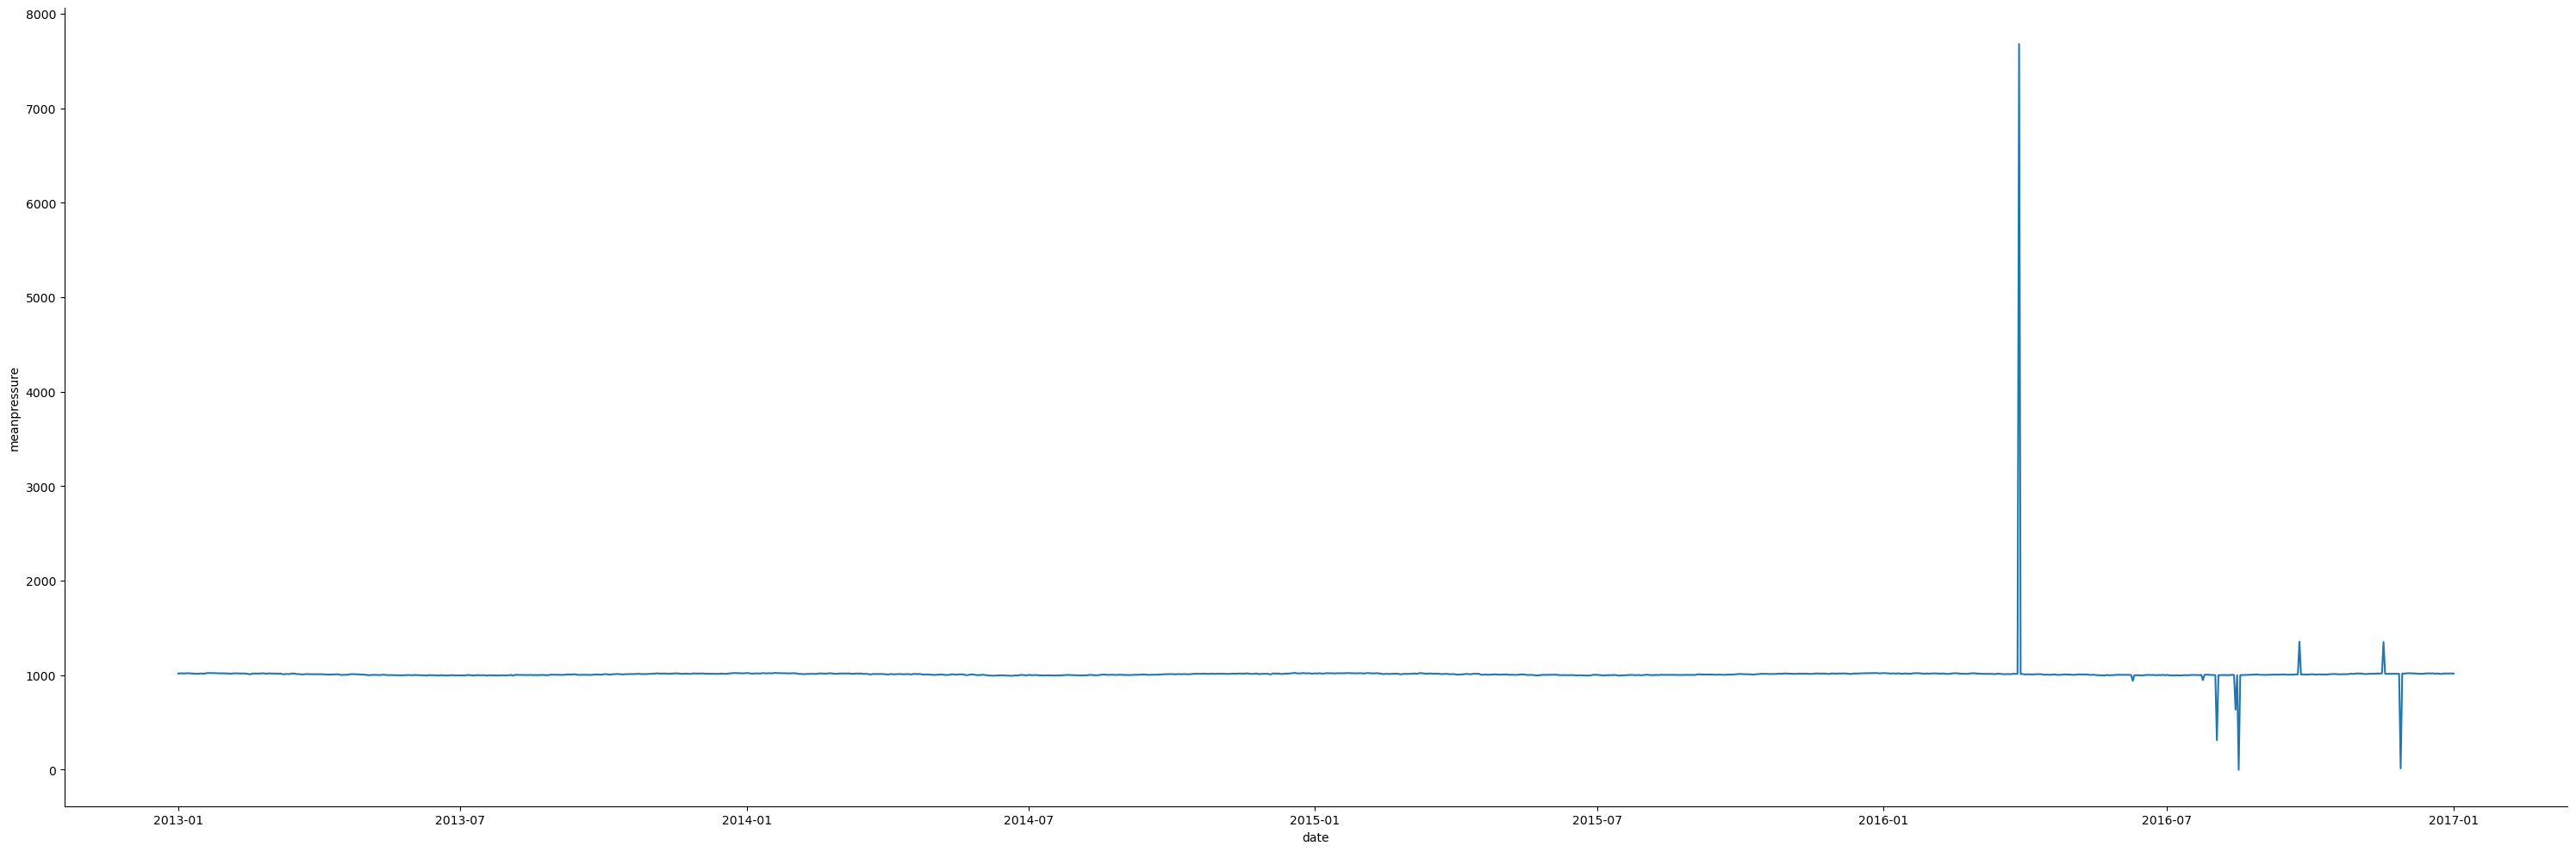

In [23]:
sns.relplot(x='date',y='meanpressure',data=train_pressure, kind="line", height=10, aspect=3)
plt.show()
plt.close()

We decided to use the mean temperature as our prediction. This jupyter notebook will be focused on making prediction for the temperature mean each month

We are going to use the ARIMA model for doing the prediction. First of all the data need to be tested for its stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller
def stationary_test_rolling(data, interval):
  data_rollmean = data.rolling(interval).mean()
  data_rollstd = data.rolling(interval).std()

  data_rollmean_drop = data_rollmean.dropna()
  data_rollstd_drop = data_rollstd.dropna()
  print("Rolling Mean:")
  print(data_rollmean_drop)
  print("Rolling Standard Deviation:")
  print(data_rollstd_drop)

  plt.figure(figsize=(16,9))
  main= plt.plot(data, color="black", label="original")
  mean= plt.plot(data_rollmean_drop, color="blue", label="rolling mean")
  std=  plt.plot(data_rollstd_drop, color="red", label="rolling std")
  plt.legend(loc="best")
  plt.title("Rolling mean and rolling standard deviation")
  plt.show()
  plt.close()

def stationary_test_dickey(data):
  data_test = adfuller(data, autolag='AIC')
  data_output = pd.Series(data_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of observations used'])
  for key,value in data_test[4].items():
    data_output["Critical Value (%s)"%key] = value
  print(data_output)

# 2. Stationarity of the data
We used rolling mean and standard deviation with the dickey fuller test to see the stationarity

Rolling Mean:
             meantemp
date                 
2013-12-31  24.791494
2014-01-01  24.800740
2014-01-02  24.810603
2014-01-03  24.825215
2014-01-04  24.836745
...               ...
2016-12-28  27.139585
2016-12-29  27.138868
2016-12-30  27.136389
2016-12-31  27.137316
2017-01-01  27.126357

[1098 rows x 1 columns]
Rolling Standard Deviation:
            meantemp
date                
2013-12-31  7.409195
2014-01-01  7.392772
2014-01-02  7.371865
2014-01-03  7.342022
2014-01-04  7.319849
...              ...
2016-12-28  6.863074
2016-12-29  6.864308
2016-12-30  6.868865
2016-12-31  6.867207
2017-01-01  6.891379

[1098 rows x 1 columns]


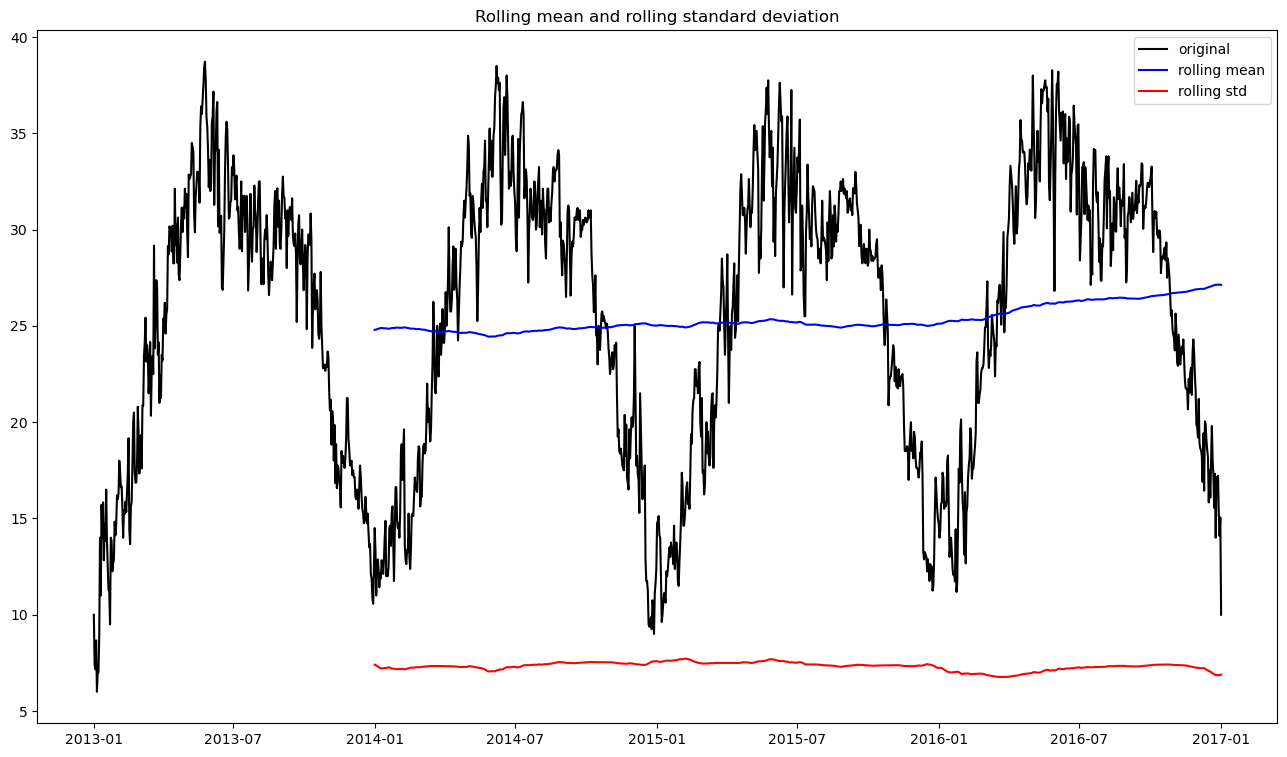

In [27]:
stationary_test_rolling(train_temp, 365)

In [28]:
stationary_test_dickey(train_temp["meantemp"])

Test Statistic                   -2.021069
p-value                           0.277412
Lags Used                        10.000000
Number of observations used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


The data is still not quite stationary yet. We need to do some methods on the data to make it more stationary

In [29]:
train_temp_per_month = train_temp['meantemp'].resample('M').mean()
test_temp_per_month = test['meantemp'].resample('M').mean()

train_temp_per_month

date
2013-01-31    12.074770
2013-02-28    16.867560
2013-03-31    22.814209
2013-04-30    28.895119
2013-05-31    33.776767
2013-06-30    32.480873
2013-07-31    30.663594
2013-08-31    29.547773
2013-09-30    29.840595
2013-10-31    26.129186
2013-11-30    18.811706
2013-12-31    15.179339
2014-01-31    13.431836
2014-02-28    15.746811
2014-03-31    21.593318
2014-04-30    28.058333
2014-05-31    31.405530
2014-06-30    34.770833
2014-07-31    32.034163
2014-08-31    31.411968
2014-09-30    29.762500
2014-10-31    26.496544
2014-11-30    20.104167
2014-12-31    14.823733
2015-01-31    12.708525
2015-02-28    18.791454
2015-03-31    21.547811
2015-04-30    28.002976
2015-05-31    33.352535
2015-06-30    32.737500
2015-07-31    30.409562
2015-08-31    30.330789
2015-09-30    30.650000
2015-10-31    26.865207
2015-11-30    20.754167
2015-12-31    14.989631
2016-01-31    15.139363
2016-02-29    19.025676
2016-03-31    25.701075
2016-04-30    32.550029
2016-05-31    34.728726
2016-06-30 

First of all, the data contained a lot of noises. We changed the dataset to read the data monthly rather than daily to reduce this noise

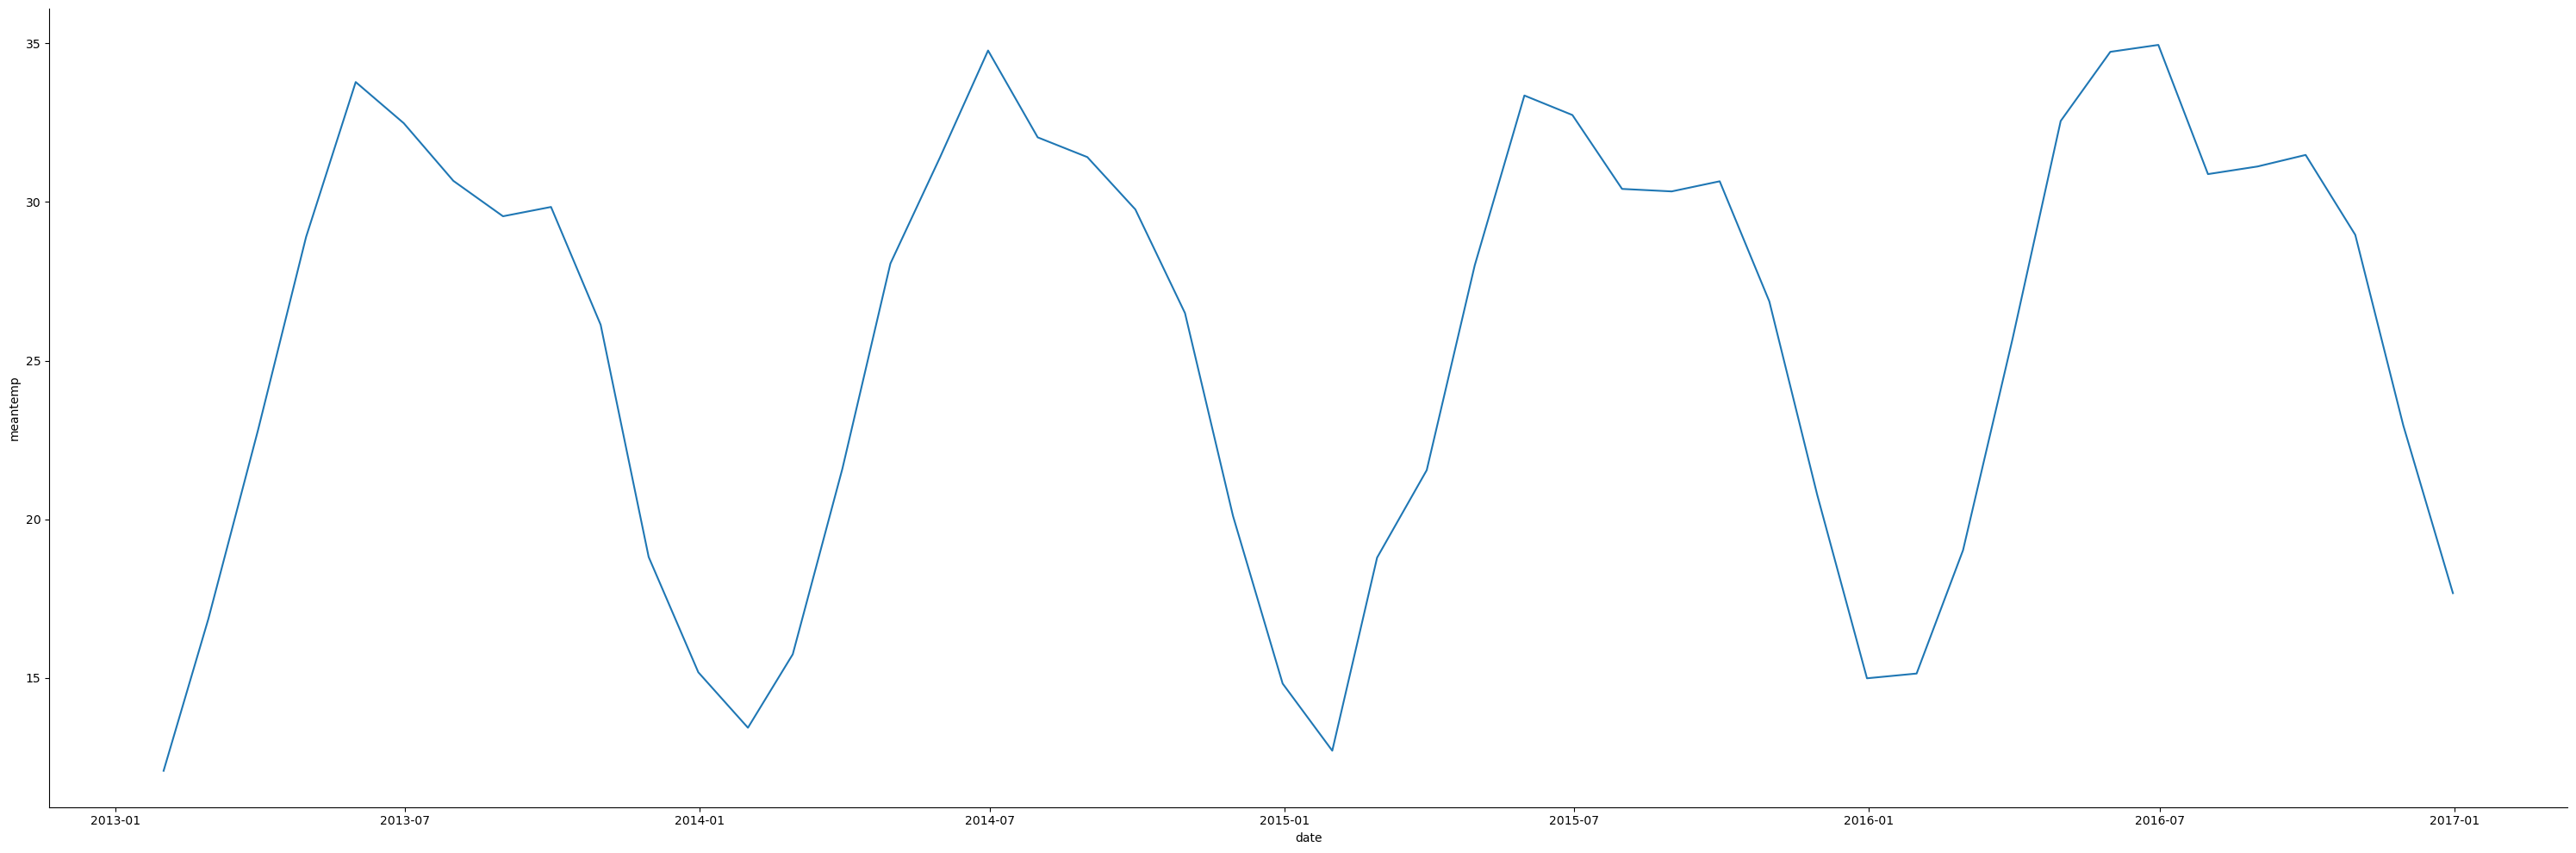

In [30]:
sns.relplot(x='date',y=train_temp_per_month,data=train_temp, kind="line", height=10, aspect=3)
plt.show()
plt.close()

We then decompose the data to observe possible trend, seasonality, and residual of the data. Those components are important to observe to help in fitting with the ARIMA model. Explanation of each are provided below:

-Trend: Trend is a long term movement pattern of the dataset over the span of long period of time. Usually the movement pattern consistently reaches towards relatively higher or lower value

-Seasonality: Seasonality shows a pattern that repeats consistently at a certain point for a certain determined period of time.

-Residual: Represents a data in a dataset that stands out as an irregularity which is left behind after the trend and seasonal components are extracted

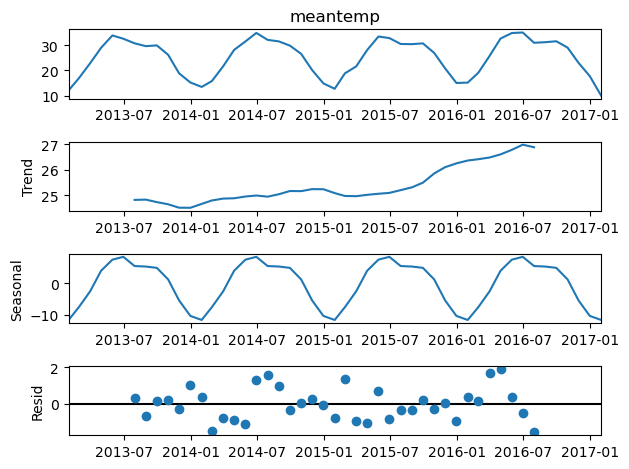

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_temp_per_month)

fig=decomposition.plot()
plt.show()
plt.close()

The data is not quite stationary yet, so we are going to use differencing in order to attempt to make it more stationary.

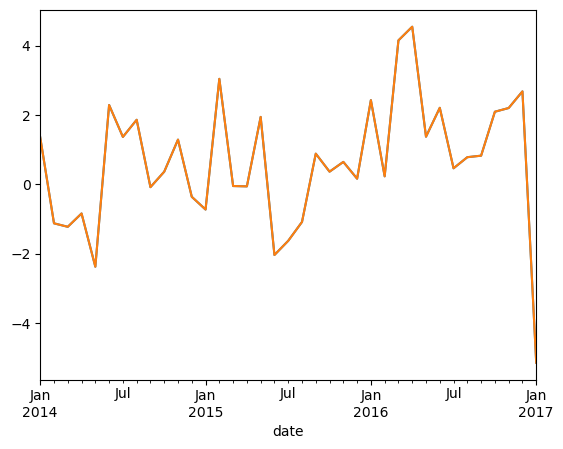

In [34]:
difference_temp = (train_temp_per_month - train_temp_per_month.shift(12)).dropna()
difference_temp.plot()
plt.show()
plt.close()

We then test the stationarity of this new differenced data with our functions from before

Rolling Mean:
Series([], Freq: M, Name: meantemp, dtype: float64)
Rolling Standard Deviation:
Series([], Freq: M, Name: meantemp, dtype: float64)


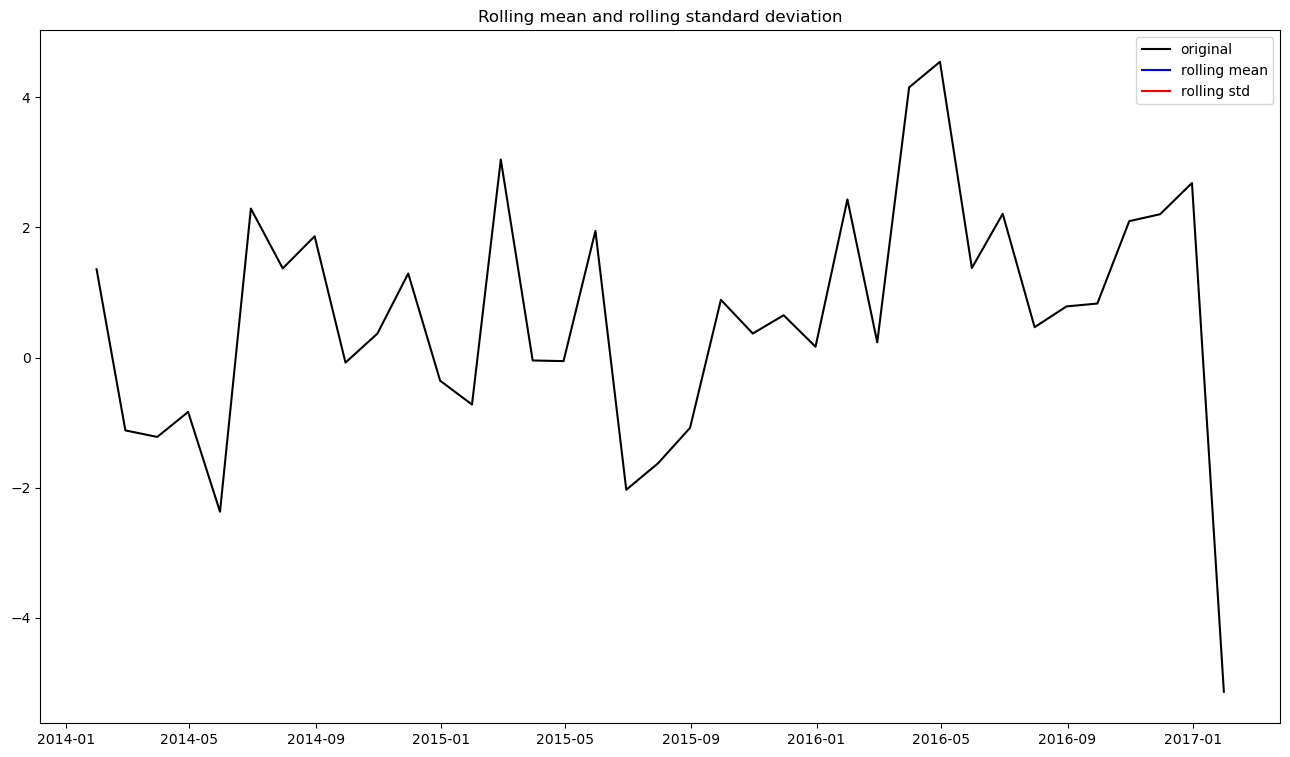

In [35]:
stationary_test_rolling(difference_temp, 365)

In [36]:
stationary_test_dickey(difference_temp)

Test Statistic                 -4.214425
p-value                         0.000623
Lags Used                       0.000000
Number of observations used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


The p value approaches zero more and the critical value is higher than the test statistics. The data is now stationary

Now, we plot the ACF and PACF to determine the best parameters for the ARIMA model

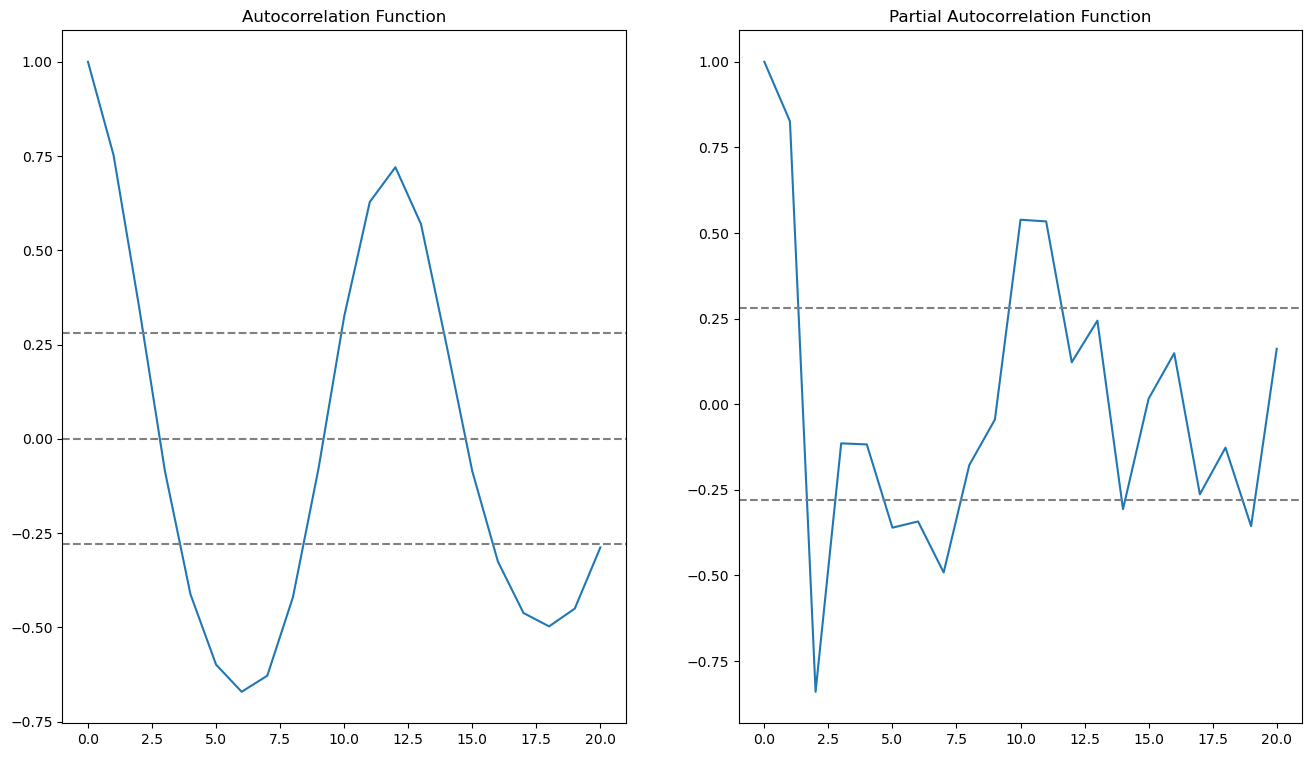

In [37]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_temp_per_month, nlags= 20)
lag_pacf = pacf(train_temp_per_month, nlags= 20, method="ols")

#plot acf
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train_temp_per_month)), linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_temp_per_month)), linestyle="--",color="gray")
plt.title("Autocorrelation Function")


#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(train_temp_per_month)), linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_temp_per_month)), linestyle="--",color="gray")
plt.title("Partial Autocorrelation Function")

plt.show()
plt.close()

We can use auto arima from pmdarima to easily help find best parameters

In [38]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(train_temp_per_month, trace=True, suppress_warnings=True, seasonal=True, m=12)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=154.686, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=147.633, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=156.606, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=155.971, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=147.522, Time=0.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=149.432, Time=0.51 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=147.497, Time=0.24 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=149.432, Time=0.51 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=147.449, Time=0.35 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=148.932, Time=0.25 sec
 ARIMA(2,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=149.00

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   49
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 -68.565
Date:                                 Tue, 17 Oct 2023   AIC                            147.131
Time:                                         10:14:09   BIC                            155.185
Sample:                                     01-31-2013   HQIC                           149.970
                                          - 01-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5113      0.214      2.387      0.017       0.092       0.931
ma.L1          0.4029      0.241      1.670      0.095      -0.070       0.876
ma.S.L12      -1.0644      0.616     -1.727      0.084      -2.272       0.144
ma.S.L24       0.6056      1.942      0.312      0.755      -3.201       4.413
sigma2         1.5569      1.628      0.956      0.339      -1.634       4.748
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                11.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                            -0.90
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Its time to use the ARIMA model to perform the fitting. We are going to use the SARIMA model(specified as SARIMAX in the syntax) to do the prediction because our data is seasonal

In [40]:
final_training_temp = train_temp_per_month.iloc[:-1]
final_testing_temp = test_temp_per_month.iloc[:-1]

print(final_training_temp, final_testing_temp)
print(final_training_temp.shape, final_testing_temp.shape)

date
2013-01-31    12.074770
2013-02-28    16.867560
2013-03-31    22.814209
2013-04-30    28.895119
2013-05-31    33.776767
2013-06-30    32.480873
2013-07-31    30.663594
2013-08-31    29.547773
2013-09-30    29.840595
2013-10-31    26.129186
2013-11-30    18.811706
2013-12-31    15.179339
2014-01-31    13.431836
2014-02-28    15.746811
2014-03-31    21.593318
2014-04-30    28.058333
2014-05-31    31.405530
2014-06-30    34.770833
2014-07-31    32.034163
2014-08-31    31.411968
2014-09-30    29.762500
2014-10-31    26.496544
2014-11-30    20.104167
2014-12-31    14.823733
2015-01-31    12.708525
2015-02-28    18.791454
2015-03-31    21.547811
2015-04-30    28.002976
2015-05-31    33.352535
2015-06-30    32.737500
2015-07-31    30.409562
2015-08-31    30.330789
2015-09-30    30.650000
2015-10-31    26.865207
2015-11-30    20.754167
2015-12-31    14.989631
2016-01-31    15.139363
2016-02-29    19.025676
2016-03-31    25.701075
2016-04-30    32.550029
2016-05-31    34.728726
2016-06-30 

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(final_training_temp, order=(0, 0, 1), seasonal_order=(0, 1, [1, 2], 12))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                meantemp   No. Observations:                   48
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 -65.850
Date:                                 Tue, 17 Oct 2023   AIC                            139.699
Time:                                         10:16:52   BIC                            146.033
Sample:                                     01-31-2013   HQIC                           141.910
                                          - 12-31-2016                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5087      0.156      3.260      0.001       0.203       0.815
ma.S.L12      -0.6680      0.530     -1.260      0.208      -1.707       0.371
ma.S.L24       0.5358      1.359      0.394      0.693      -2.127       3.199
sigma2         1.7356      1.686      1.029      0.303      -1.570       5.041
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.85   Prob(JB):                         0.76
Heteroskedasticity (H):               2.27   Skew:                             0.23
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2017-01-31    14.794731
2017-02-28    18.881890
2017-03-31    22.850472
2017-04-30    29.549974
2017-05-31    33.482179
2017-06-30    33.964362
2017-07-31    30.777029
2017-08-31    30.989945
2017-09-30    31.030627
2017-10-31    27.796494
2017-11-30    21.976307
2017-12-31    15.965157
2018-01-31    15.196495
Freq: M, Name: predicted_mean, dtype: float64


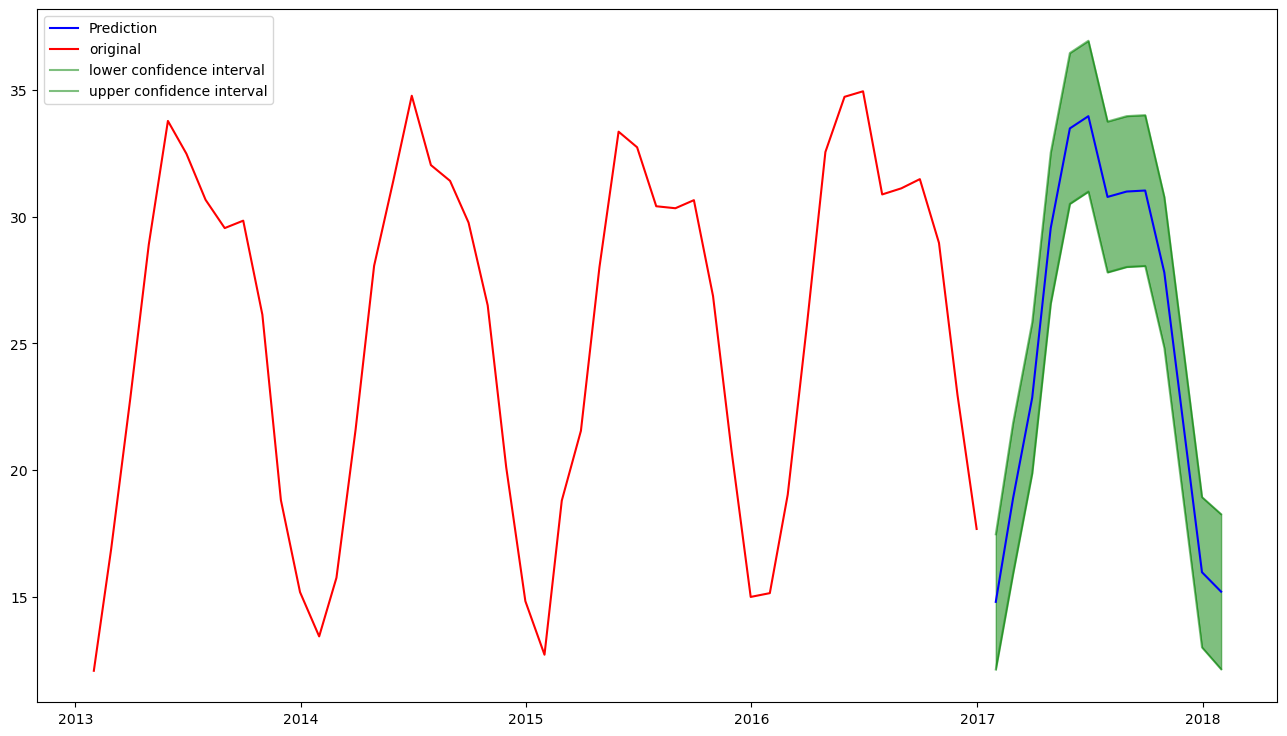

In [47]:
month = 12
start = len(final_training_temp)
end = len(final_training_temp) + month


pred=model.predict(start=start, end=end)
conf_int=model.get_prediction(start=start, end=end).conf_int()

print(pred)
plt.figure(figsize=(16,9))
plt.plot(pred, color="blue", label="Prediction")
plt.plot(final_training_temp, color="red", label="original")
plt.plot(conf_int["lower meantemp"], color="green", label="lower confidence interval",alpha=0.5)
plt.plot(conf_int["upper meantemp"], color="green", label="upper confidence interval",alpha=0.5)
plt.fill_between(pred.index, conf_int["lower meantemp"], conf_int["upper meantemp"], color='green', alpha=0.5)
plt.legend(loc="upper left")
plt.show()
plt.close()

Now we make a function to make the predictions when needed

In [65]:
def averageTemperature_pred(month, year=2018, displayGraph=True, displayValue=True, returnValue=True):
    start = len(final_training_temp)
    end = len(final_training_temp) + (year-2017)*12 + (month-1)


    pred=model.predict(start=start, end=end)
    conf_int=model.get_prediction(start=start, end=end).conf_int()
    
    
    if(displayValue==True):
        print("The prediction values:")
        print(pred)
        print(" ")
        print("The lower confidence intervals:")
        print(conf_int["lower meantemp"])
        print(" ")
        print("The lower confidence intervals:")
        print(conf_int["upper meantemp"])
        print(" ")
        
    if(displayGraph==True):
        plt.figure(figsize=(16,9))
        plt.plot(pred, color="blue", label="Prediction")
        plt.plot(conf_int["lower meantemp"], color="green", label="lower confidence interval",alpha=0.5)
        plt.plot(conf_int["upper meantemp"], color="green", label="upper confidence interval",alpha=0.5)
        plt.fill_between(pred.index, conf_int["lower meantemp"], conf_int["upper meantemp"], color='green', alpha=0.5)
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
    if(returnValue==True):
        return [pred[-1],conf_int["lower meantemp"][-1],conf_int["upper meantemp"][-1]]


The prediction values:
2017-01-31    14.794731
2017-02-28    18.881890
2017-03-31    22.850472
2017-04-30    29.549974
2017-05-31    33.482179
2017-06-30    33.964362
2017-07-31    30.777029
2017-08-31    30.989945
2017-09-30    31.030627
2017-10-31    27.796494
2017-11-30    21.976307
2017-12-31    15.965157
2018-01-31    15.196495
Freq: M, Name: predicted_mean, dtype: float64
The lower confidence intervals:
2017-01-31    12.126777
2017-02-28    15.905571
2017-03-31    19.874153
2017-04-30    26.573655
2017-05-31    30.505860
2017-06-30    30.988043
2017-07-31    27.800710
2017-08-31    28.013626
2017-09-30    28.054308
2017-10-31    24.820174
2017-11-30    18.999987
2017-12-31    12.999473
2018-01-31    12.137357
Freq: M, Name: lower meantemp, dtype: float64
The lower confidence intervals:
2017-01-31    17.462684
2017-02-28    21.858209
2017-03-31    25.826792
2017-04-30    32.526293
2017-05-31    36.458498
2017-06-30    36.940681
2017-07-31    33.753348
2017-08-31    33.966265
2017-

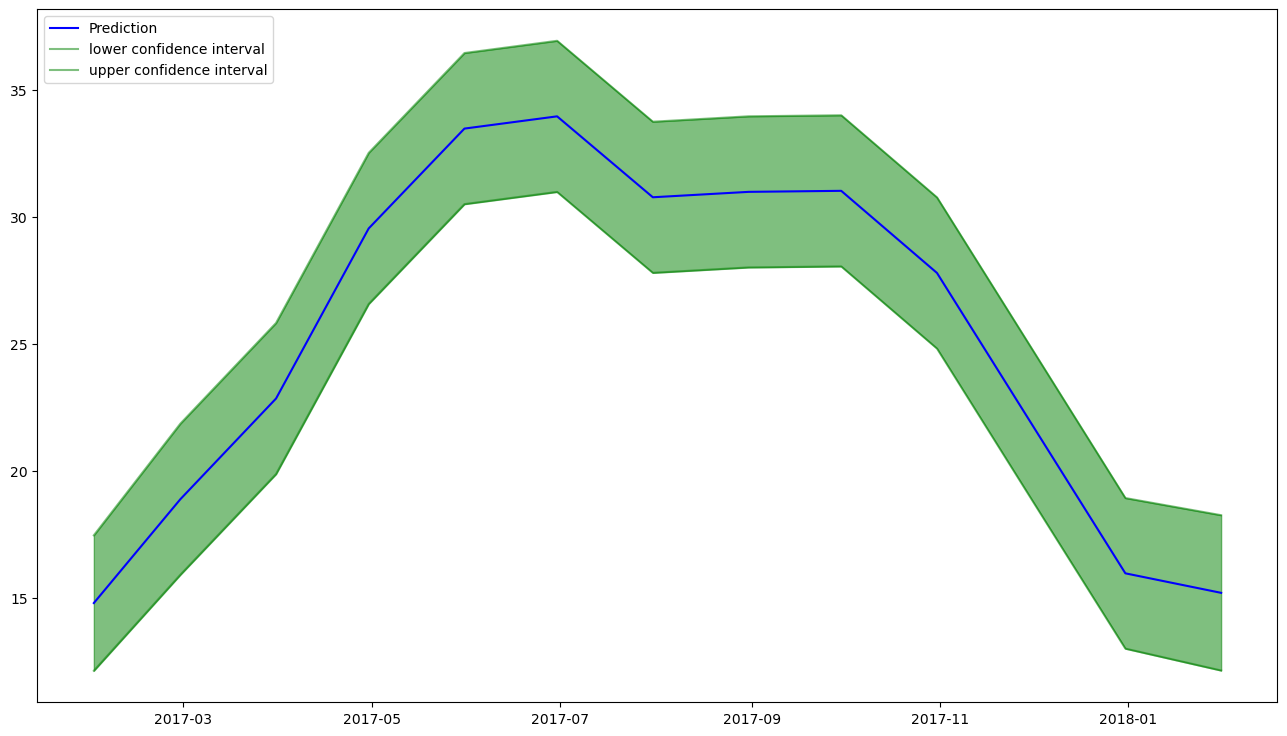

[15.196495000006838, 12.137357103323298, 18.25563289669038]

In [62]:
averageTemperature_pred(12)

References:

1. Basic explanation and introduction to time series analysis

    https://www.youtube.com/watch?v=e8Yw4alG16Q (by youtube channel edureka!)

2. Turning the data stationary

    https://www.youtube.com/watch?v=1c_QpeLlcjg (by youtube channel Unfold Data Science)

3. More explanation of ARIMA method

    https://www.youtube.com/watch?v=8FCDpFhd1zk (by youtube channel Nachiketa Hebbar)

    https://www.youtube.com/watch?v=-aCF0_wfVwY (by youtube channel Lianne and Justin)